In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel(r'E:\Gayathri\Pricing Analytics\Source\Agmarket_Commodity_StateWiseData\Rajasthan.xlsx')

In [3]:
df1=pd.DataFrame()

In [4]:
#df1=df[(df['Commodity'] == 'Wheat') & (df['Market'] == 'Anoopgarh') & (df['Variety'] == 'Dara')]
df1=df[(df['Commodity'] == 'Barley (Jau)') & (df['Market'] == 'Alwar') & (df['Variety'] == 'Other')]

In [5]:
df1['Arrivals']=df1['Arrivals'].str.replace(',','').replace('nan','NaN').astype('float')

C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\2442083992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Arrivals']=df1['Arrivals'].str.replace(',','').replace('nan','NaN').astype('float')


In [6]:
df1['Reported Date']=pd.to_datetime(df1['Reported Date'])

C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\1524859383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reported Date']=pd.to_datetime(df1['Reported Date'])


In [7]:
df1=df1.sort_values(by='Reported Date')

In [8]:
df1['Arrivals'].fillna(method = 'bfill',inplace=True)

In [9]:
df1['Year']=df1['Reported Date'].dt.year
df1['Month']=df1['Reported Date'].dt.month
df1['Week']=df1['Reported Date'].dt.week
df1['Date_Group']=df1['Reported Date'].dt.year.astype(str) +'#'+df1['Reported Date'].dt.month.astype(str)+'#'+df1['Reported Date'].dt.week.astype(str)

C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\2226878606.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Week']=df1['Reported Date'].dt.week
C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\2226878606.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['Date_Group']=df1['Reported Date'].dt.year.astype(str) +'#'+df1['Reported Date'].dt.month.astype(str)+'#'+df1['Reported Date'].dt.week.astype(str)


In [10]:
new_df=[]
t=0
for i in  df1.groupby('Date_Group'):
    t=t+1
    temp_df=pd.DataFrame()
    temp_df=pd.DataFrame([i[1].iloc[0].values],columns=i[1].columns)
    temp_df['Modal Price']=i[1]['Modal Price'].mean()
    temp_df['Min Price']=i[1]['Min Price'].mean()
    temp_df['Arrivals']=i[1]['Arrivals'].sum()
    temp_df['Max Price']=i[1]['Max Price'].mean()
    temp_df['Dummy_Index']=f'W{t}'
    new_df.append(temp_df)
df1=pd.concat(new_df)

In [11]:
df1['Date_Index']=df1['Dummy_Index']

In [12]:
df1.set_index('Date_Index', inplace=True)

In [13]:
len(df1.index)

173

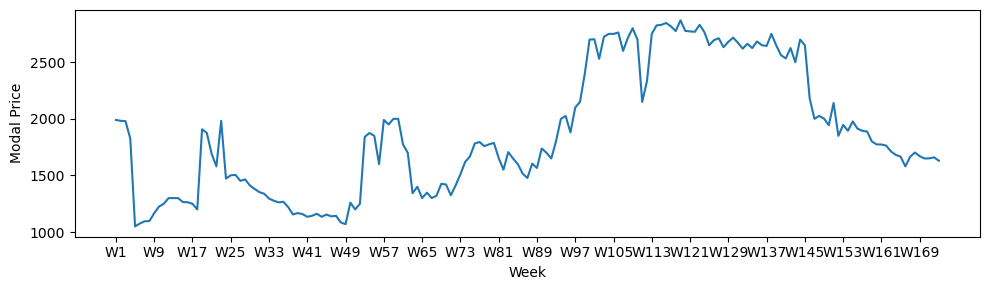

In [14]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
plt.xticks(df1.index[::8]) 
plt.xlabel('Week')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

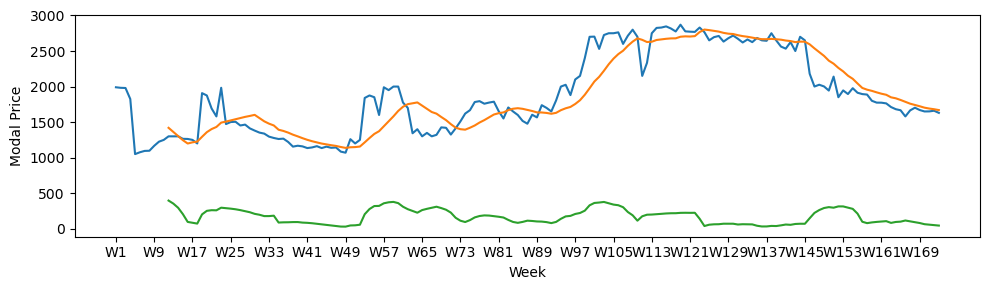

In [15]:
df1['rollMean']  = df1['Modal Price'].rolling(window=12).mean()
df1['rollStd']  = df1['Modal Price'].rolling(window=12).std()

plt.figure(figsize=(10,3))

sns.lineplot(data=df1,x=df1.index,y=df1['Modal Price'])
sns.lineplot(data=df1,x=df1.index,y=df1.rollMean)

sns.lineplot(data=df1,x=df1.index,y=df1.rollStd)
plt.xticks(df1.index[::8]) 
plt.xlabel('Week')
plt.ylabel('Modal Price')

plt.tight_layout()
plt.show() 

In [16]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(df1['Modal Price'],autolag='AIC',)
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
print(stats)
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

Test Statistic                  -1.758868
p-value                          0.401065
#lags used                       9.000000
number of observations used    163.000000
dtype: float64
criticality 1% : -3.471118535474365
criticality 5% : -2.8794405060097024
criticality 10% : -2.576313761526591


In [17]:
-1.326726<-3.4816817173418295

False

In [18]:
air_df=pd.DataFrame()

In [19]:
air_df['shift'] = df1['Modal Price'].shift(24)
air_df['shiftDiff'] = df1['Modal Price'] - air_df['shift']
air_df.head()

,shift,shiftDiff
Date_Index,,
W1,NaN,NaN
W2,NaN,NaN
W3,NaN,NaN
W4,NaN,NaN
W5,NaN,NaN


In [20]:
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(air_df['shiftDiff'].dropna(),autolag='AIC',)
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
print(stats)

for key, values in adfTest[4].items():
    print('criticality',key,":",values)

Test Statistic                  -2.087229
p-value                          0.249681
#lags used                       9.000000
number of observations used    139.000000
dtype: float64
criticality 1% : -3.4782936965183815
criticality 5% : -2.882567574015525
criticality 10% : -2.5779830117488745


In [21]:
stats[0]

-2.08722938938017

<Axes: xlabel='Date_Index', ylabel='shiftDiff'>

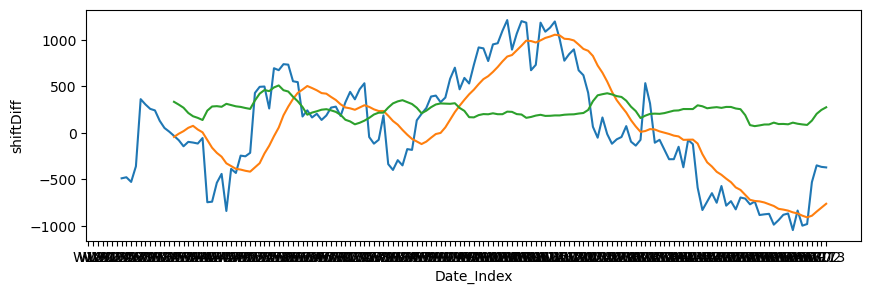

In [22]:
air_df['rollMean']  = air_df['shiftDiff'].rolling(window=12).mean()
air_df['rollStd']  = air_df['shiftDiff'].rolling(window=12).std()

plt.figure(figsize=(10,3))
sns.lineplot(data=air_df,x=air_df.index,y=air_df['shiftDiff'])
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollMean)
sns.lineplot(data=air_df,x=air_df.index,y=air_df.rollStd)

In [23]:
airP=pd.DataFrame()

In [24]:
airP['Modal Price'] = df1['Modal Price'].copy(deep=True)
airP['firstDiff'] = df1['Modal Price'].diff()
airP['Diff12'] = df1['Modal Price'].diff(12)

In [25]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=20).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=20).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\1384540531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=20).mean()
C:\Users\Sort\AppData\Local\Temp\ipykernel_21284\1384540531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=20).std()


Test Statistic                -1.062855e+01
p-value                        5.287010e-19
#lags used                     1.000000e+00
number of observations used    1.590000e+02
dtype: float64
criticality 1% : -3.472161410886292
criticality 5% : -2.8798954259680936
criticality 10% : -2.5765565828092245


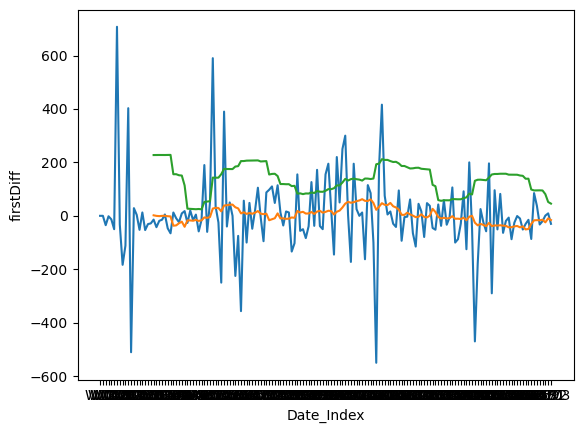

In [26]:
test_stationarity(airP.dropna(),'firstDiff')

In [27]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
import numpy as np
import statsmodels.api as sm

# Example time series data
#time_series_data = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Calculate ACF
acf_values = sm.tsa.acf(df1['Modal Price'], fft=False)

print("ACF Values:", acf_values)


ACF Values: [1.         0.96092557 0.92608697 0.89979794 0.87354688 0.838941
 0.81136816 0.78198521 0.74679101 0.72340035 0.69477434 0.66712068
 0.643433   0.62712278 0.6100915  0.60134997 0.59198668 0.57734622
 0.5632157  0.55516607 0.53835666 0.51769363 0.4966132 ]


E:\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


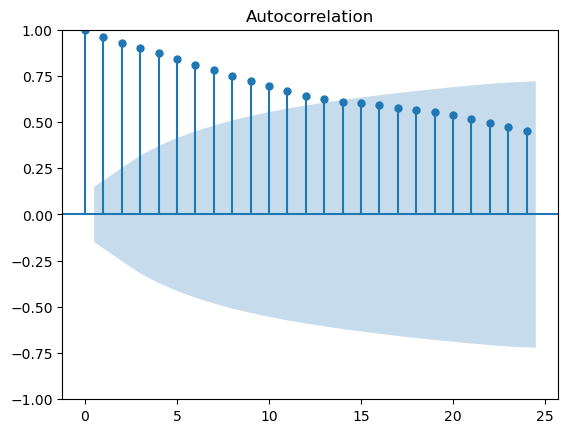

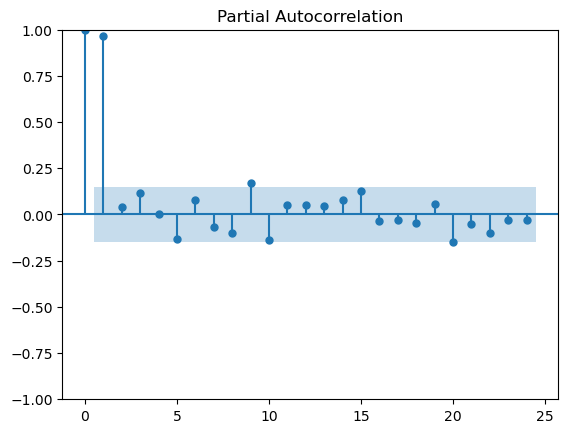

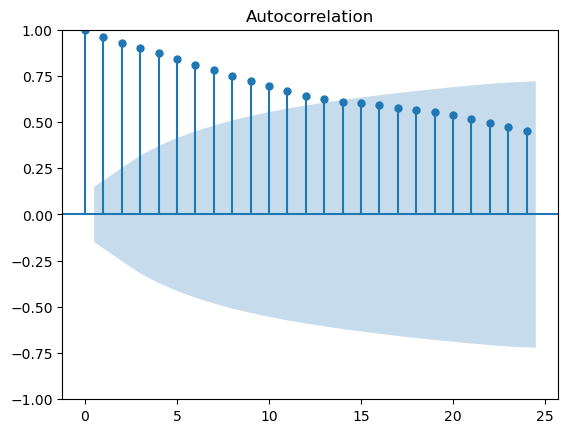

In [29]:
plot_pacf(df1['Modal Price'],lags=24)
plot_acf(df1['Modal Price'],lags=24)

In [30]:
'From PACF  '# AR p 6
'The Data is staionery by itself' #d 0 Default Staionery
'From ACF  '# MA q 1

'From ACF  '

In [31]:
train = df1[:round(len(df1)*70/100)]
test = df1[round(len(df1)*70/100):]
test.head()

,State,District,Market,Variety,Group,Arrivals,Min Price,Max Price,Modal Price,Reported Date,Commodity,Year,Month,Week,Date_Group,Dummy_Index,rollMean,rollStd
Date_Index,,,,,,,,,,,,,,,,,,
W122,Rajasthan,Alwar,Alwar,Other,Cereals,36.6,2621.250000,2812.500000,2768.75,2022-05-23,Barley (Jau),2022,5,21,2022#5#21,W122,2709.513889,224.759341
W123,Rajasthan,Alwar,Alwar,Other,Cereals,2.4,2800.000000,2850.000000,2830.00,2022-05-30,Barley (Jau),2022,5,22,2022#5#22,W123,2766.180556,140.974579
W124,Rajasthan,Alwar,Alwar,Other,Cereals,11.3,2725.000000,2800.000000,2765.00,2022-06-01,Barley (Jau),2022,6,22,2022#6#22,W124,2802.097222,38.557429
W125,Rajasthan,Alwar,Alwar,Other,Cereals,4.1,2612.500000,2662.500000,2650.00,2022-06-06,Barley (Jau),2022,6,23,2022#6#23,W125,2793.763889,57.159696
W126,Rajasthan,Alwar,Alwar,Other,Cereals,35.0,2680.833333,2699.333333,2695.00,2022-06-13,Barley (Jau),2022,6,24,2022#6#24,W126,2782.930556,62.747559


In [32]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train['Modal Price'],order=(9,0,7))
model_fit = model.fit()

E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

In [33]:
test.index[-1]

'W173'

In [34]:
dd=model_fit.forecast(steps=len(test))

E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
dd=pd.DataFrame()
dd['arimaPred']=pd.concat([train['Modal Price'],model_fit.forecast(steps=len(test))])

E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
dd.index=df1.index

In [37]:
len(model_fit.forecast(steps=len(test)))

E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


52

<Axes: xlabel='Date_Index', ylabel='Modal Price'>

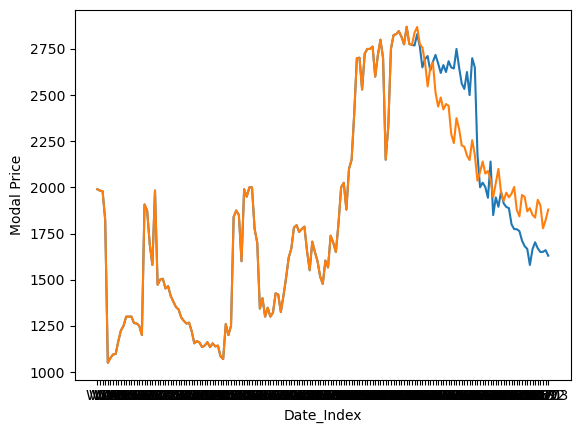

In [38]:
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
sns.lineplot(data=dd,x=dd.index,y='arimaPred')

In [39]:
dd['arimaPred']

Date_Index
W1      1990.000000
W2      1982.500000
W3      1980.000000
W4      1825.000000
W5      1050.000000
           ...     
W169    1932.699360
W170    1903.111628
W171    1778.521481
W172    1822.638838
W173    1879.751137
Name: arimaPred, Length: 173, dtype: float64

In [40]:
#import statsmodels.api as sm
#model = sm.tsa.statespace.SARIMAX(train['Modal Price'],order=(2,0,5),seasonal_order=(2,0,5,20))
#model_fit = model.fit()

E:\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


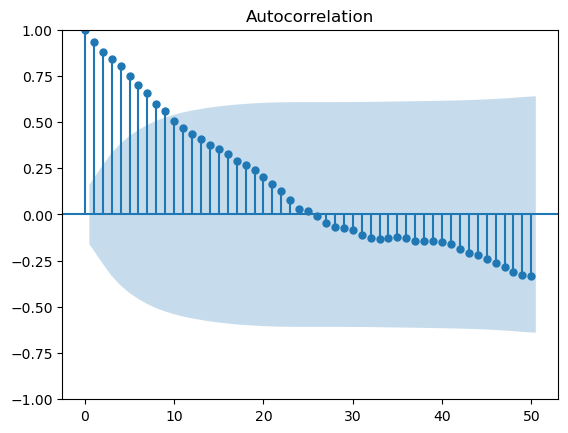

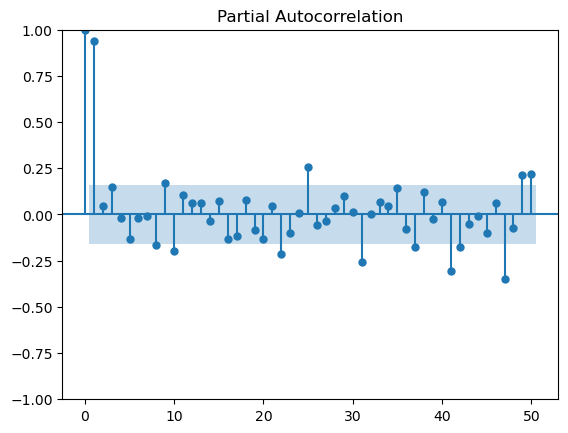

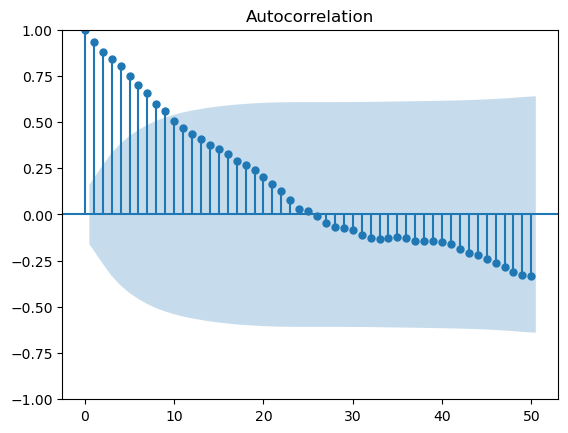

In [41]:
plot_pacf(air_df['shiftDiff'].dropna(),lags=50)
plot_acf(air_df['shiftDiff'].dropna(),lags=50)

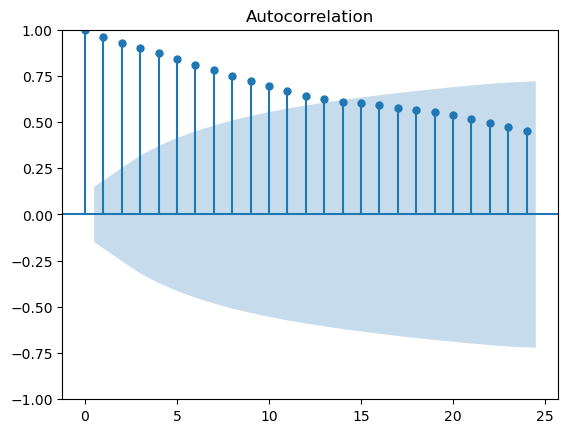

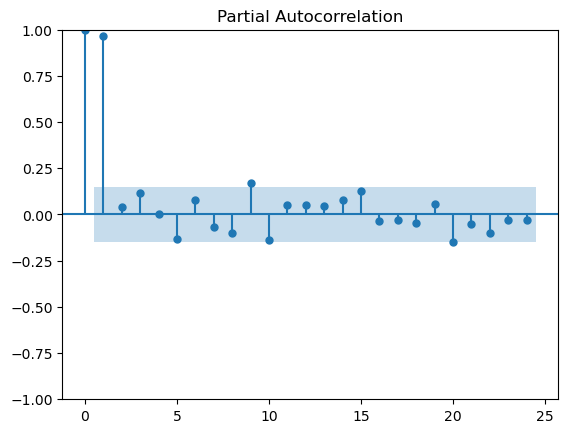

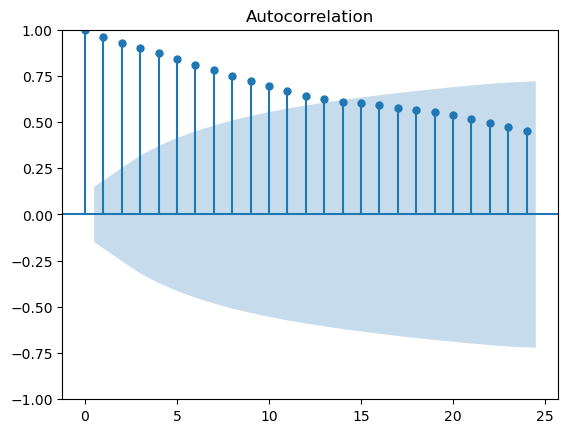

In [42]:
plot_pacf(df1['Modal Price'],lags=24)
plot_acf(df1['Modal Price'],lags=24)

E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal 

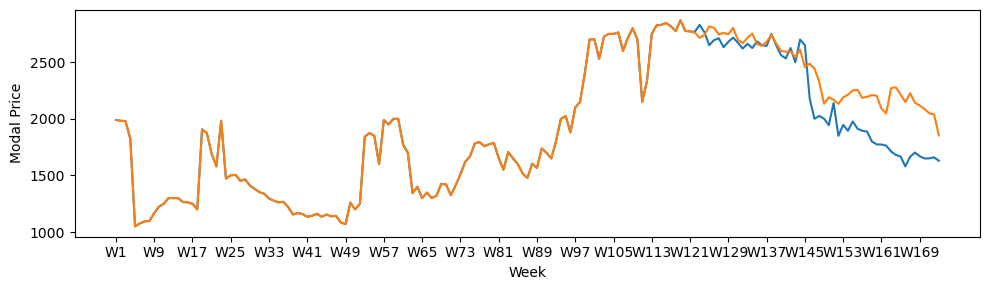

In [43]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train['Modal Price'],order=(9,0,7),seasonal_order=(9,0,7,24))
model_fit = model.fit()
dd=model_fit.forecast(steps=len(test))
dd=pd.DataFrame()
dd['arimaPred']=pd.concat([train['Modal Price'],model_fit.forecast(steps=len(test))])
dd.index=df1.index
plt.figure(figsize=(10,3))
sns.lineplot(data=df1,x=df1.index,y='Modal Price')
sns.lineplot(data=dd,x=dd.index,y='arimaPred')
plt.xticks(df1.index[::8])
plt.xlabel('Week')
plt.ylabel('Modal Price')
plt.tight_layout()
plt.show()

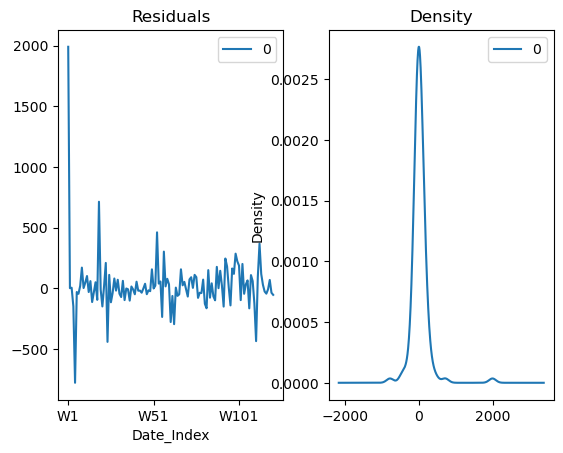

In [44]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [45]:
df1['Year']=df1['Year'].astype(str)
df1['Month']=df1['Month'].astype(str)

In [46]:
df1[['Year','Month']].apply("-".join, axis=1).unique()

array(['2020-1', '2020-10', '2020-11', '2020-12', '2020-2', '2020-3',
       '2020-4', '2020-5', '2020-6', '2020-7', '2020-8', '2020-9',
       '2021-1', '2021-10', '2021-11', '2021-12', '2021-2', '2021-3',
       '2021-4', '2021-5', '2021-6', '2021-7', '2021-8', '2021-9',
       '2022-1', '2022-10', '2022-11', '2022-12', '2022-2', '2022-3',
       '2022-4', '2022-5', '2022-6', '2022-7', '2022-8', '2022-9',
       '2023-1', '2023-2', '2023-3', '2023-4', '2023-5', '2023-6',
       '2023-7', '2023-8'], dtype=object)

In [47]:
#df1.to_csv(r'C:\Users\Sort\Desktop\Reference.csv')

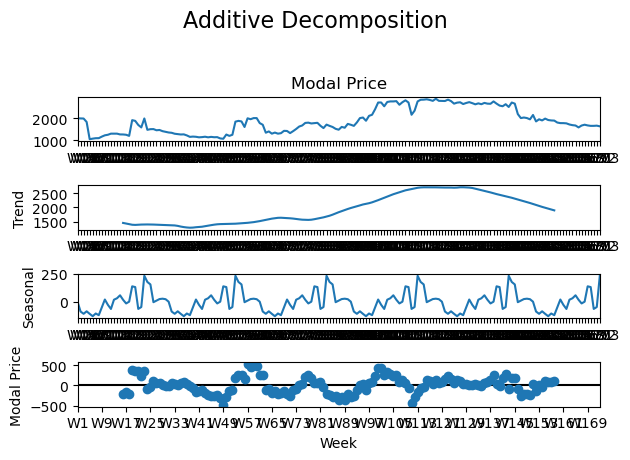

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
additive_decomposition = seasonal_decompose(df1['Modal Price'], model='additive', period=30)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)

plt.xticks(df1.index[::8]) 
plt.xlabel('Week')
plt.ylabel('Modal Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [49]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
